In [2]:
import sys
sys.path.append('../')

In [3]:
from scripts.utils import data_path, set_mpl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
%matplotlib inline


# Nway run in distnce-only mode + autocalibration

In [4]:
''' 
cd /Users/sdbykov/work/lockman_hole/0_data/`


nway.py ERO_lhpv_03_23_sd01_a15_g14.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_auto_cal.fits --radius 20 --mag DESI:nnprior auto --mag-radius 3 ;
nway.py ERO_lhpv_03_23_sd01_a15_g14_random.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_auto_cal_random.fits --radius 20 --mag DESI:nnprior auto --mag-radius 3;


nway-calibrate-cutoff.py nway/nway_auto_cal.fits nway/nway_auto_cal_random.fits



For a false detection rate of <1%
--> use only counterparts with p_any>0.87 (0.53% of matches)

For a false detection rate of <3%
--> use only counterparts with p_any>0.81 (0.60% of matches)

For a false detection rate of <5%
--> use only counterparts with p_any>0.77 (0.64% of matches)

For a false detection rate of <10%
--> use only counterparts with p_any>0.72 (0.67% of matches)



'''

' \ncd /Users/sdbykov/work/lockman_hole/0_data/`\n\n\nnway.py ERO_lhpv_03_23_sd01_a15_g14.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_auto_cal.fits --radius 20 --mag DESI:nnprior auto --mag-radius 3 ;\nnway.py ERO_lhpv_03_23_sd01_a15_g14_random.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_auto_cal_random.fits --radius 20 --mag DESI:nnprior auto --mag-radius 3;\n\n\nnway-calibrate-cutoff.py nway/nway_auto_cal.fits nway/nway_auto_cal_random.fits\n\n\n\nFor a false detection rate of <1%\n--> use only counterparts with p_any>0.87 (0.53% of matches)\n\nFor a false detection rate of <3%\n--> use only counterparts with p_any>0.81 (0.60% of matches)\n\nFor a false detection rate of <5%\n--> use only counterparts with p_any>0.77 (0.64% of matches)\n\nFor a false detection rate of <10%\n--> use only counterparts with p_any>0.72 (0.67% of matches)\n\n\n\n'

In [5]:
dat = Table.read(data_path+'nway/nway_auto_cal.fits', format='fits')
matches = dat.to_pandas()
matches.sort_values(by=['EROSITA_ID', 'p_i' ], inplace=True, ascending=[True, False])
matches.head(5)

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,EROSITA_ML_FLUX_0,DESI_desi_id,DESI_ra,DESI_dec,DESI_mag_g,DESI_mag_r,...,Separation_DESI_EROSITA,Separation_max,ncat,dist_bayesfactor,dist_post,bias_DESI_nnprior,p_single,p_any,p_i,match_flag
13707,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_231',154.762154,56.504538,21.087423,20.774010,...,5.167984,5.167984,2,9.299730,0.454734,35.435112,0.967269,0.969284,0.936481,1
13712,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_263',154.767108,56.505610,25.208895,24.323198,...,6.306570,6.306570,2,9.186378,0.391131,2.302445,0.596622,0.969284,0.046871,0
13708,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_239',154.763287,56.506903,23.636383,22.371996,...,4.917724,4.917724,2,9.321630,0.467263,0.236225,0.171632,0.969284,0.006566,0
13710,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_229',154.761950,56.509082,23.785849,23.093630,...,13.191211,13.191211,2,8.021732,0.042118,4.174492,0.155085,0.969284,0.005817,0
13714,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,b'9011_606779_270',154.767902,56.504561,27.925978,23.945800,...,8.700814,8.700814,2,8.874632,0.238597,0.236225,0.068923,0.969284,0.002346,0


In [6]:
dat = Table.read(data_path+'nway/nway_auto_cal_random.fits', format='fits')
matches_rand = dat.to_pandas()
matches_rand.sort_values(by=['EROSITA_ID', 'p_i' ], inplace=True, ascending=[True, False])
matches_rand.head(5)

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,EROSITA_ML_FLUX_0,DESI_desi_id,DESI_ra,DESI_dec,DESI_mag_g,DESI_mag_r,...,Separation_DESI_EROSITA,Separation_max,ncat,dist_bayesfactor,dist_post,bias_DESI_nnprior,p_single,p_any,p_i,match_flag
10468,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_398',154.789385,56.497124,23.867940,23.635174,...,6.066957,6.066957,2,9.212102,0.405324,1.078614,0.423687,0.466488,0.840795,1
10471,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_426',154.793393,56.497386,23.982150,23.206541,...,11.309926,11.309926,2,8.421648,0.099444,0.910999,0.091402,0.466488,0.115050,0
10472,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_436',154.795591,56.497017,25.877258,24.937063,...,14.437622,14.437622,2,7.722952,0.021621,0.986169,0.021328,0.466488,0.024924,0
10469,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_381',154.786876,56.491487,23.870918,22.769096,...,14.856746,14.856746,2,7.616427,0.016998,0.893218,0.015211,0.466488,0.017665,0
10470,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,b'9011_606779_444',154.796880,56.498503,23.917429,22.273796,...,19.280264,19.280264,2,6.306278,0.000846,0.894490,0.000757,0.466488,0.000866,0


In [7]:
matches.p_any.quantile(1-0.33)

0.9680237770080566

<AxesSubplot:>

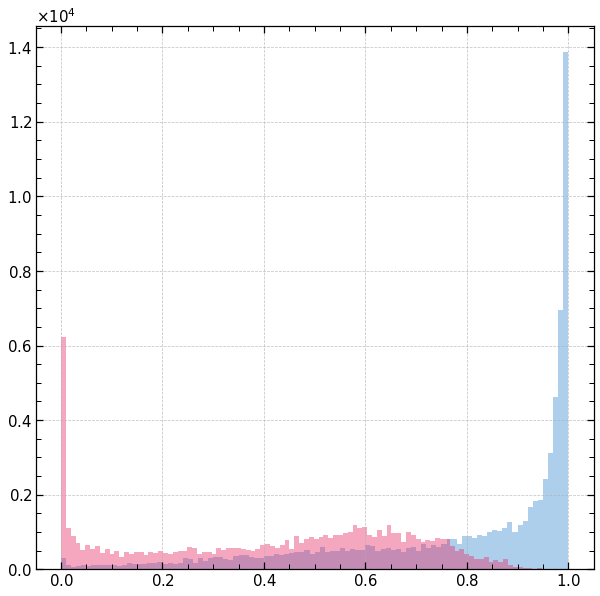

In [8]:
plt.figure(figsize=(10,10))
matches.p_any.hist(bins=100, alpha = 0.4)
matches_rand.p_any.hist(bins=100, alpha = 0.4)

<Figure size 720x720 with 0 Axes>

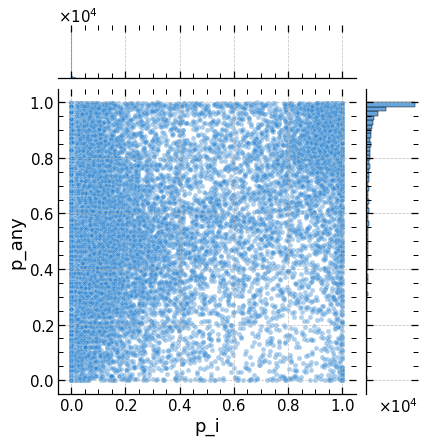

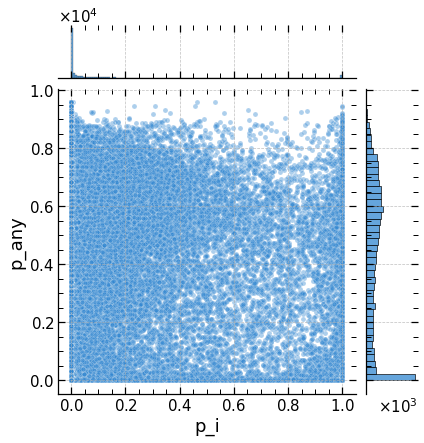

In [9]:
plt.figure(figsize=(10,10))
sns.jointplot(x = matches.p_i, y = matches.p_any, alpha = 0.4)
sns.jointplot(x = matches_rand.p_i, y = matches_rand.p_any, alpha = 0.4)

Text(0, 0.5, 'p_any')

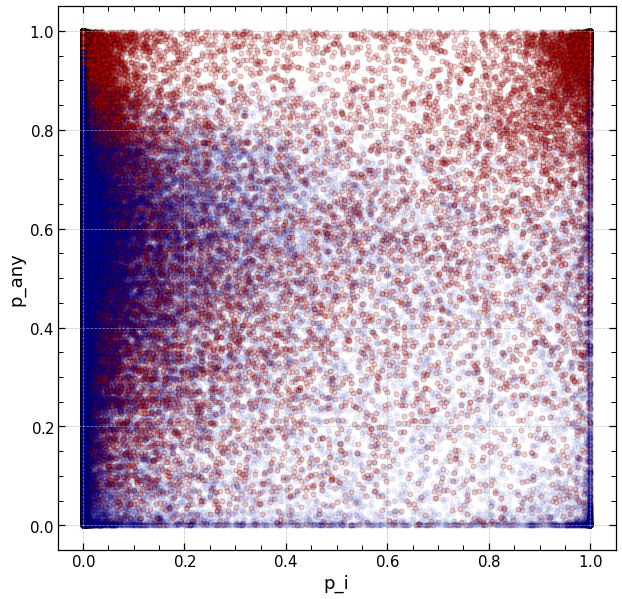

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(matches.p_i, matches.p_any, alpha = 0.2, c = 'red')
plt.scatter(matches_rand.p_i, matches_rand.p_any, alpha = 0.05, c = 'blue')
plt.xlabel('p_i')
plt.ylabel('p_any')